In [ ]:
!pip install pycaret-ts-alpha sktime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pycaret.time_series import *
from sktime.forecasting.model_selection._split import SlidingWindowSplitter
import time

In [3]:
path = "/content/drive/MyDrive/study/dataset/complete_dataset.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)
# テストデータの切り離し
df = df.loc[: "2018-12-31"]
df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


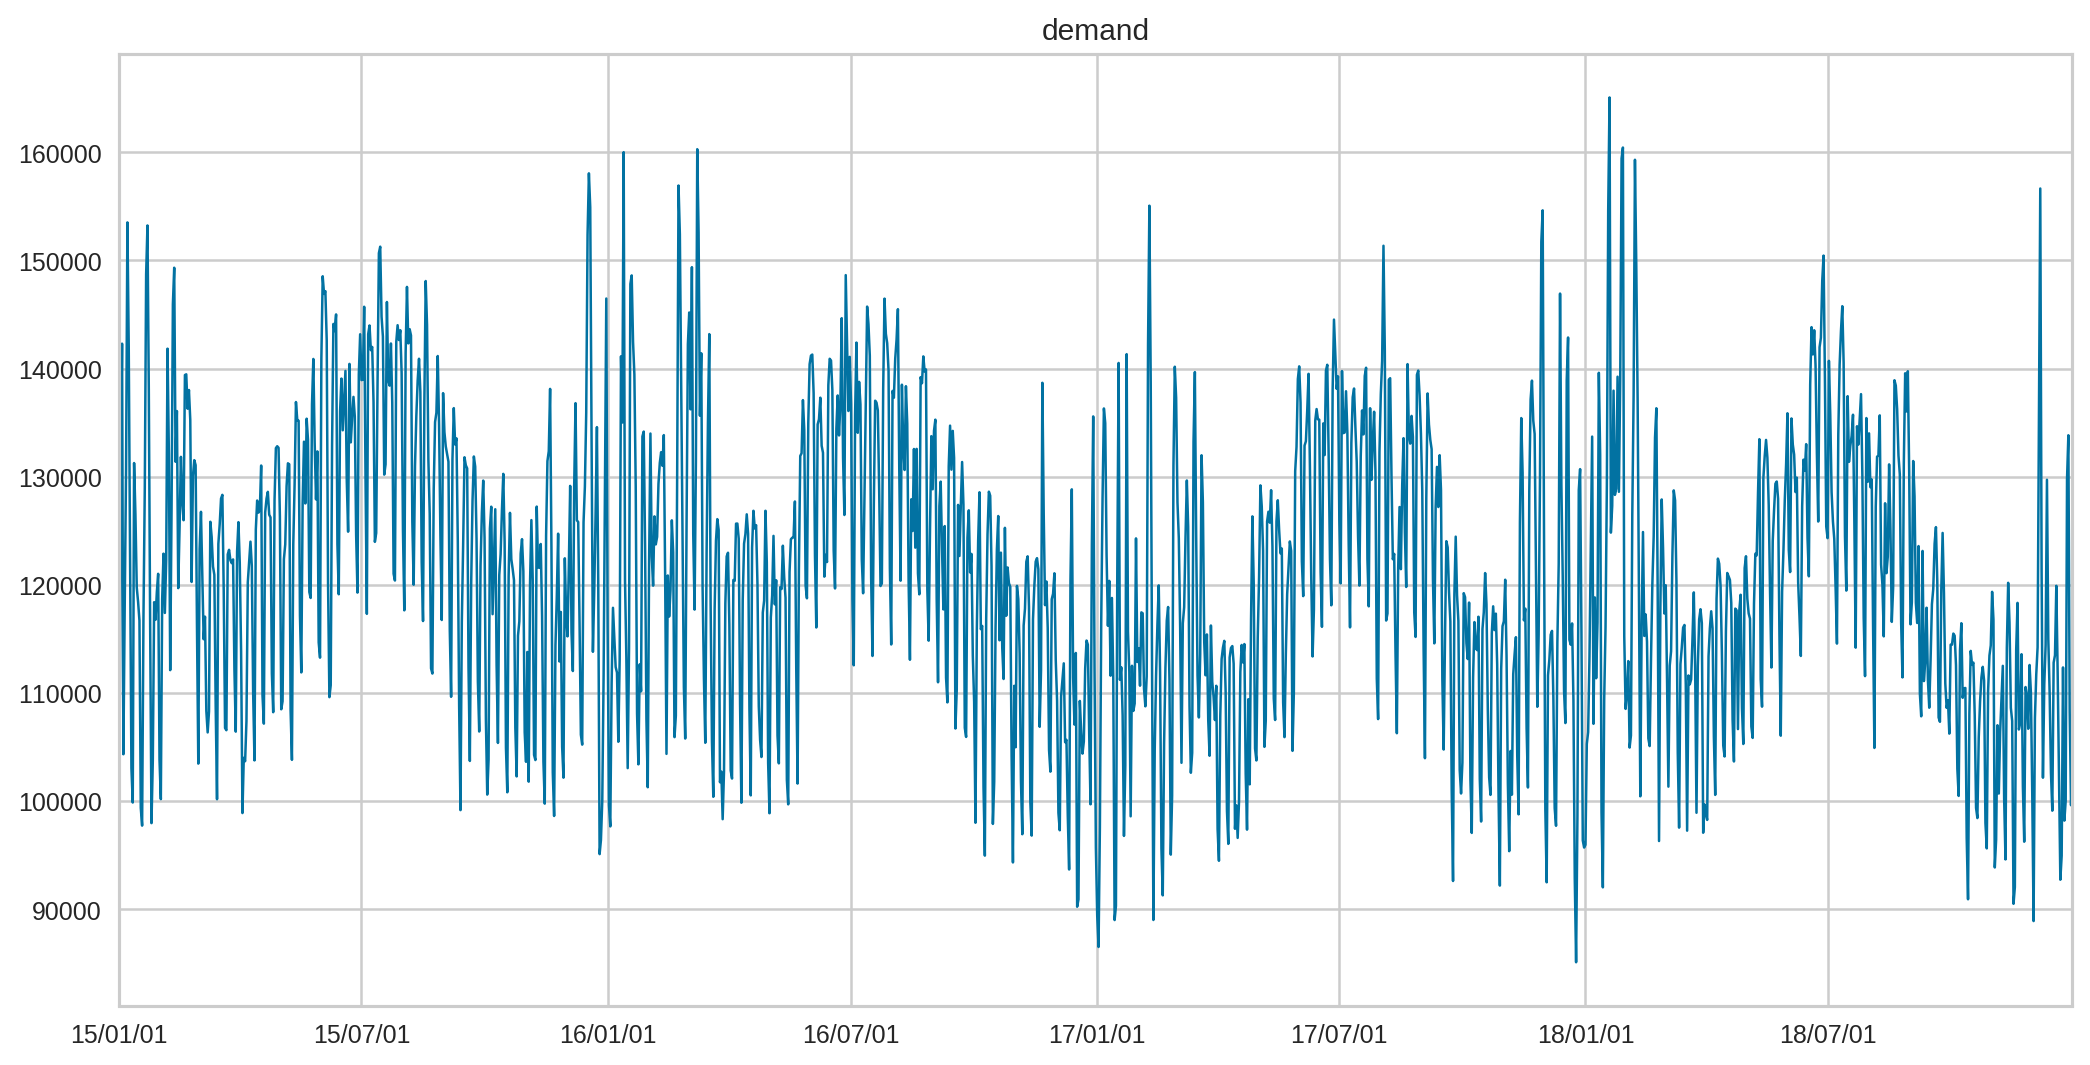

In [4]:
target = 'demand'

fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = df[target].to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

In [5]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

In [6]:
# カテゴリ変数の変換
df["holiday"] = df["holiday"].map({'N': 0, 'Y': 1})
df["school_day"] = df["school_day"].map({'N': 0, 'Y': 1})

In [7]:
# 欠損値のチェック
df.isnull().sum()

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [19]:
# 実験の設定
# window_length：学習期間、 fh ：検証期間、step_length：ずらす量
my_custom_cv = SlidingWindowSplitter(fh=np.arange(1, 366), window_length=365, step_length=365)
setup(
    data=df, # データ
    target = "demand", 
    ignore_features = ['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'], 
    numeric_imputation_exogenous = "linear", 
    scale_target = "zscore", 
    scale_exogenous = "zscore",
    fold_strategy = my_custom_cv,
    fh = np.arange(2, 3),  # 2日先予測
    seasonal_period = 'D',
    verbose = False,
    session_id = 13
    )

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 2631
INFO:logs:self.variable_keys: {'exp_name_log', 'strictly_positive', 'X_test', 'all_sp_values', 'fold_generator', '_all_models_internal', 'n_jobs_param', 'logging_param', '_all_models', 'seasonal_period', 'master_model_container', 'X_transformed', '_gpu_n_jobs_param', 'memory', 'seed', '_all_metrics', 'fold_groups_param_full', 'X', '_ml_usecase', 'index_type', 'enforce_exogenous', 'seasonality_present', 'pipeline', 'fold_param', 'y_test_transformed', 'html_param', 'data', 'enforce_pi', 'exp_id', 'log_plots_param', 'idx', 'variable_keys', 'experiment__', 'y_train_transformed', 'fh', 'X_train', 'y_test', '_available_plots', 'USI', 'exogenous_present', 'display_container', 'primary_sp_to_use', 'y_transformed', 'y_train', 'gpu_param', 'X_test_transformed', 'X_train_transformed', 'y', 'app

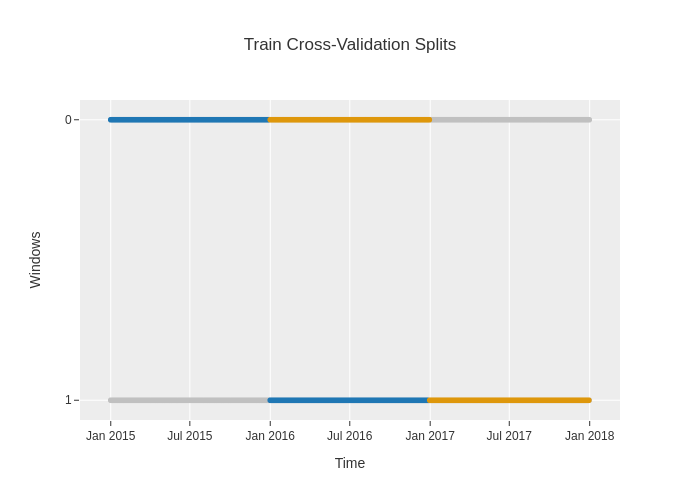

INFO:logs:Visual Rendered Successfully


In [20]:
# cvのやり方をプロット
plot_model(plot="cv")

In [21]:
start = time.time()
best = compare_models(sort = 'MAPE')
elapsed_time = time.time() - start

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,7793.9516,10334.7566,0.0643,0.0654,1.0067,0.9502,0.4141,18.950
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,8275.3496,11018.1871,0.0677,0.0702,1.0708,1.0159,0.3287,19.375
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,8580.256,11600.1276,0.0713,0.0724,1.1075,1.0655,0.2633,1.010
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,9102.6113,11865.0991,0.0749,0.0763,1.172,1.0872,0.2311,0.335
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,9365.0219,12133.6515,0.0773,0.0786,1.2065,1.1125,0.1956,0.625
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,9401.3951,12443.9708,0.0776,0.0794,1.212,1.1427,0.1524,0.560
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,9508.1808,12475.5194,0.0792,0.0793,1.2199,1.1346,0.1407,1.050
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.605
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.655
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.615


INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=KNeighborsRegressor(n_jobs=-1), sp=7,
                    window_length=7)
INFO:logs:compare_models() successfully completed......................................


In [22]:
print("compare_modelsにかかった時間:{0}".format(elapsed_time) + "[sec]")

compare_modelsにかかった時間:279.45254278182983[sec]


In [23]:
print(best)

BaseCdsDtForecaster(regressor=KNeighborsRegressor(n_jobs=-1), sp=7,
                    window_length=7)


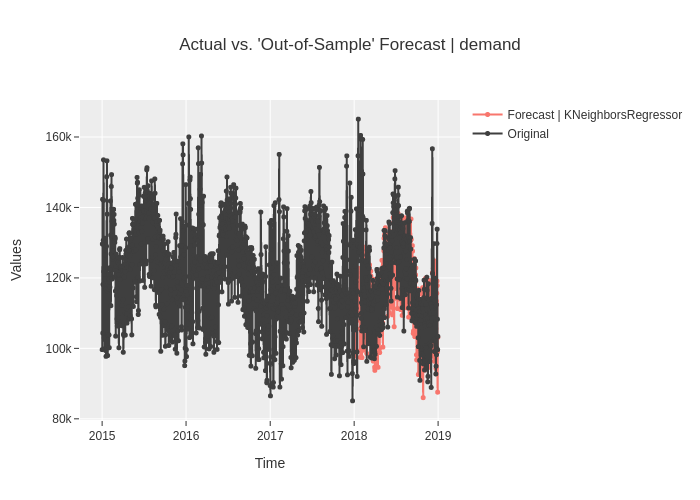

INFO:logs:Visual Rendered Successfully


In [24]:
plot_model(best, plot="forecast")

In [14]:
?create_model()

lightGBMをチューニング

In [25]:
my_custom_cv = SlidingWindowSplitter(fh=np.arange(1, 366), window_length=365, step_length=365)
setup(
    data=df, # データ
    target = "demand", # 目的変数
    ignore_features = ['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'],
    numeric_imputation_exogenous = "linear",
    scale_target = "zscore",
    scale_exogenous = "zscore",
    fold_strategy = my_custom_cv,
    fh = np.arange(2, 3), 
    seasonal_period = 'D',
    verbose = False,
    session_id = 13
    )
lgbm = create_model('lightgbm_cds_dt')
print(lgbm)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2015-12-31,7645.0208,10690.5942,0.0647,0.0625,0.9505,0.9153,0.3587
1,2016-12-30,9515.4911,12509.6611,0.0779,0.0823,1.2644,1.2156,0.1678
Mean,NaT,8580.2560,11600.1276,0.0713,0.0724,1.1075,1.0655,0.2633
SD,NaT,935.2351,909.5334,0.0066,0.0099,0.1570,0.1501,0.0955


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)
INFO:logs:create_model() successfully completed......................................


BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [17]:
tuned_lgbm = tune_model(lgbm) 
print(tuned_lgbm)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2015-12-31,8914.2599,10591.4894,0.0745,0.0731,1.1083,0.9069,0.3705
1,2016-12-30,10771.0965,13301.5689,0.0880,0.0912,1.4313,1.2925,0.0591
Mean,NaT,9842.6782,11946.5291,0.0812,0.0822,1.2698,1.0997,0.2148
SD,NaT,928.4183,1355.0397,0.0068,0.0090,0.1615,0.1928,0.1557


INFO:logs:master_model_container: 4
INFO:logs:display_container: 3
INFO:logs:BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)
INFO:logs:tune_model() succesfully completed......................................


BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [26]:
final_lgbm = finalize_model(tuned_lgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f7156335c90>, estimator=BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f7156335c90>, estimator=BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwar

In [27]:
print(final_lgbm)

BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [28]:
predict_model(final_lgbm);

ValueError: ignored